<a href="https://colab.research.google.com/github/tpetric7/tpetric7.github.io/blob/main/Letter_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
knitr::opts_chunk$set(echo = TRUE)



# 0. Packages



In [2]:
install.packages(c("tidytext","scales","rmarkdown","janitor","quanteda","readtext"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘ISOcodes’, ‘qpdf’, ‘RCurl’, ‘rjson’, ‘ndjson’, ‘hunspell’, ‘tokenizers’, ‘janeaustenr’, ‘snakecase’, ‘fastmatch’, ‘RcppParallel’, ‘SnowballC’, ‘stopwords’, ‘RcppArmadillo’, ‘antiword’, ‘pdftools’, ‘readODS’, ‘streamR’, ‘striprtf’


Warning message in install.packages(c("tidytext", "scales", "rmarkdown", "janitor", :
“installation of package ‘pdftools’ had non-zero exit status”
Warning message in install.packages(c("tidytext", "scales", "rmarkdown", "janitor", :
“installation of package ‘readtext’ had non-zero exit status”


In [ ]:
library(tidyverse)
library(tidytext)
library(scales)
# library(readtext)
library(rmarkdown)
library(janitor)
# library(qdap) # syllable_count and syllable_sum
# library(quanteda) # nsyllable(tokens(txt))


# 1. Datensatz lesen

Die *readtext()*-Funktion erlaubt Einlesen von mehreren Dateien auf einfache Art und Weise.
Mit *docvarsfrom* erhalten wird eine neue Spalte in der Tabelle, die wir mit der Funktion *rename()* umbenennen.
Mit *encoding = "UTF-8"* teilen wir dem Programm mit, wie der Text kodiert ist (Code Page).


In [ ]:
# novels_txt = readtext("data/books/*.txt", docvarsfrom = "filenames", encoding = "UTF-8") %>% 
#   rename(title = docvar1)
# novels_txt


In [38]:
github = "https://raw.githubusercontent.com/tpetric7/tpetric7.github.io/main/data/books/"
prozess = read_lines(paste0(github, "prozess.txt"))
tom = read_lines(paste0(github, "tom.txt"))

Wir wandeln die Texte in Datensätze um.

In [39]:
prozess = as_tibble(prozess) %>% rename(text = value) %>% mutate(doc_id = "prozess") %>% mutate(title = "prozess")
tom = as_tibble(tom) %>% rename(text = value) %>% mutate(doc_id = "tom") %>% mutate(title = "tom")
novels = rbind(prozess, tom)

# 2. Buchstaben extrahieren

## aus Liste

Der reguläre Ausdruck *[a-zA-Z]* extrahiert nur Buchstaben des englischen Alphabets, *[:alpha:]* extrahiert dagegen auch nicht-englische Buchstaben, z.B. deutsche oder slowenische Sonderzeichen. Zahlen und andere spezielle Zeichen (z.B. Interpunktion) werden auf diese Weise nicht extrahiert.

Regex *{1}* (= default) extrahiert Einzelbuchstaben. Bei Verwendung von *{2}* werden jeweils zwei aufeinander folgende Buchstaben extrahiert.

Die Funktion *tolower()* sorgt dafür, dass Großbuchstaben in Kleinbuchstaben umgewandelt werden. Falls zwischen großen und kleinen Buchstaben unterschieden werden soll, entfernen wir diese Funktion aus dem Programmkode.


In [41]:
# letters = tolower(novels_txt$text) %>% str_extract_all(pattern = "[:alpha:]{1}")
letters = as.character(tolower(novels$text)) %>% str_extract_all(pattern = "[:alpha:]{1}")
letters[[1]][1:10]
letters[[2]][1:9]


[1] "d" "e" "r" "p" "r" "o" "z" "e" "s" "s"

[1] "t" "o" "m" "s" "a" "w" "y" "e" "r"

## aus Datensatz

Tabellen und Graphiken erstellen ist leichter, wenn wir die Texte in Datensätze umwandeln, und zwar mit der Funktion *as.data.frame()*.


In [ ]:
# novels = as.data.frame(novels_txt)



Mit der Funktion *unnest_tokens()* können wir auch Buchstaben isolieren und anschließend auszählen.



In [42]:
library(tidytext)

novels_character <- novels %>%
  unnest_tokens(character, text, token = "characters", to_lower = TRUE, drop = T)

head(novels_character)


doc_id,title,character
<chr>,<chr>,<chr>
prozess,prozess,d
prozess,prozess,e
prozess,prozess,r
prozess,prozess,p
prozess,prozess,r
prozess,prozess,o


# 3. Buchstaben zählen

Mit *count()* können wir die Häufigkeit einer Variable (hier: der Buchstaben) auszählen.


In [43]:
novels_character %>% 
  count(character, sort = TRUE) %>% 
  paged_table()


character,n
<chr>,<int>
e,114769
n,70151
i,52767
r,47937
s,42610
t,42057
a,39825
h,38600
d,33683


Der tidytext-Tokenizer hat nicht nur Buchstaben, sondern auch Zahlen extrahiert. Da wir nur an der Häufigkeit von Buchstaben interessiert sind, filtern wir die Zahlen und andere Zeichen heraus. Dazu verwenden wir die Funktionen *filter()* und zusätzlich *str_detect()*, da wir für diese Aufgabe einen regulären Ausdruck nutzen wollen.



In [44]:
novels_character %>% 
  filter(str_detect(character, "[:alpha:]")) %>% 
  count(character, sort = T) %>% 
  paged_table()


character,n
<chr>,<int>
e,114769
n,70151
i,52767
r,47937
s,42610
t,42057
a,39825
h,38600
d,33683


Ein paar Zeichen, die nicht zum deutschen Alphabet gehören und mit dem vorherigen Programm-Schritt nicht herausfiltern konnten, werden im nächsten Schritt ebenfalls herausgefiltert.

Wir speichern das Ergebnis als neue Tabelle mit dem Namen "char_freq".


In [45]:
char_freq = novels_character %>% 
  filter(str_detect(character, "[:alpha:]")) %>% 
  filter(!str_detect(character, "é|á")) %>% 
  count(character, sort = T)

char_freq %>% paged_table()


character,n
<chr>,<int>
e,114769
n,70151
i,52767
r,47937
s,42610
t,42057
a,39825
h,38600
d,33683


Insgesamt haben wir 30 Buchstaben des deutschen Alphabets in den Romanen unterschieden.
Aus wie vielen Buchstaben des deutschen Alphabets bestehen die Romane? Die Summe erhalten wir mit der Funktion *summarise()* - fast 700 Tausend.


In [46]:
char_freq %>% 
  summarise(total = sum(n))


total
<int>
694556


Es ist nun wirklich Zeit, mal ein Bild zu malen! 
Dazu verwenden wir das Programm (library) *ggplot2*, das im Programmbündel *tidyverse* enthalten ist.

Das Diagramm zeigt sehr deutlich, dass gewaltige Häufigkeitsunterschiede im deutschen Alphabet bestehen.


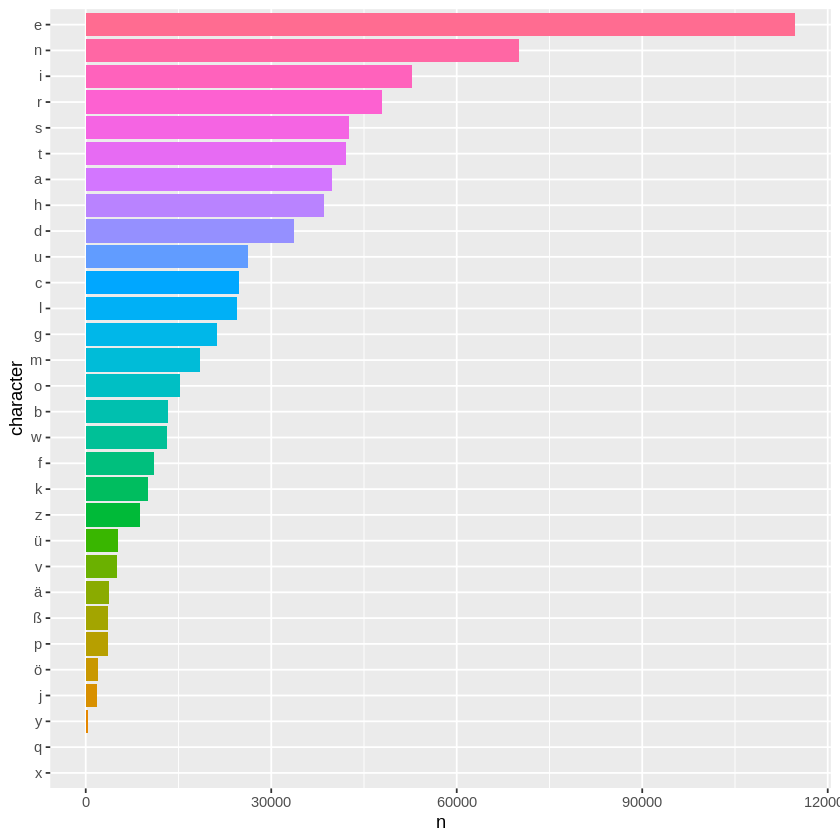

In [47]:
char_freq %>% 
  mutate(character = fct_reorder(character, n)) %>% # Sortieren nach Frequenz
  ggplot(aes(n, character, fill = character)) +
  geom_col() +
  theme(legend.position = "none")


Eine bessere Vorstellung von den Zahlenverhältnissen erhalten wir, wenn wir die mehrstelligen Zahlenwerte in Prozente umwandeln.



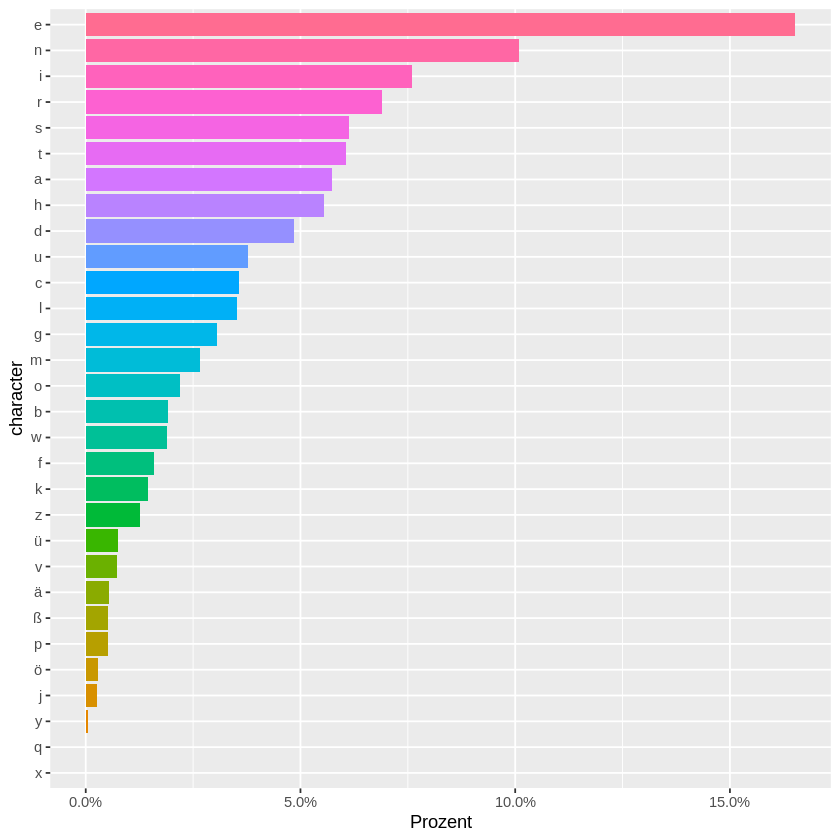

In [48]:
library(scales)
char_freq %>% 
  mutate(Prozent = n / sum(n)) %>% # Umwandlung in Prozente
  ungroup() %>% 
  mutate(character = fct_reorder(character, Prozent)) %>% # Sortieren nach Prozenten
  ggplot(aes(Prozent, character, fill = character)) +
  geom_col() +
  theme(legend.position = "none") +
  scale_x_continuous(labels = percent) # Prozent-Format


Getrennte tabellarische Darstellung für die Texte:



In [49]:
novels_character %>% 
  group_by(doc_id) %>% 
  count(character, sort = TRUE) %>% 
  pivot_wider(names_from = doc_id, values_from = n) %>% 
  paged_table()


character,prozess,tom
<chr>,<int>,<int>
e,60978,53791
n,36237,33914
i,28426,24341
r,25884,22053
t,21751,20306
s,21690,20920
a,20817,19008
h,20095,18505
d,17247,16436


Getrennte graphische Darstellung für die Texte:



<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

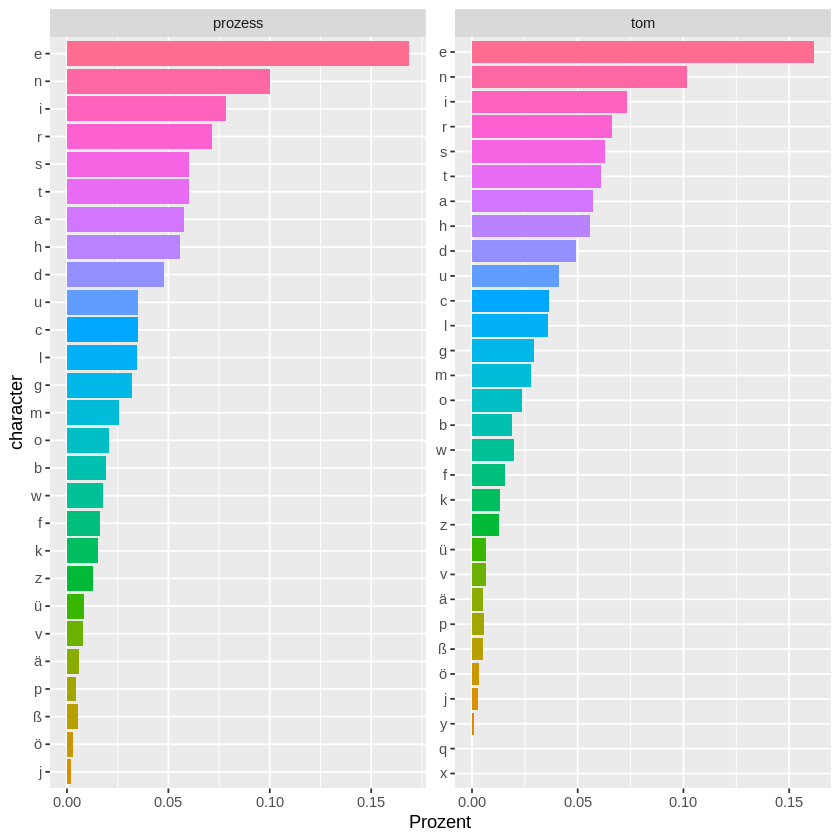

In [50]:
library(scales)
novels_character %>% 
  group_by(doc_id) %>% 
  count(character, sort = TRUE) %>% 
  mutate(Prozent = n / sum(n)) %>% # Umwandlung in Prozente
  ungroup() %>% 
  mutate(character = fct_reorder(character, Prozent)) %>% # Sortieren nach Prozenten
  filter(Prozent > 0.0001) %>% 
  ggplot(aes(Prozent, character, fill = character)) +
  geom_col() +
  theme(legend.position = "none") +
  facet_wrap(~ doc_id, scales = "free")
  scale_x_continuous(labels = percent) # Prozent-Format


# 4. Vokale

Betrachten wir zunächst nur die Buchstaben, die Vokale symbolisieren!
Zu diesem Zweck bilden wir eine Vokalliste. Zwischen den Vokalen setzen wir das "oder"-Zeichen ein: den *logischen Operator* "|".


In [51]:
vokale = "a|e|i|o|u|ä|ö|ü|y"



Die Vokalliste "vokale" verwenden wir mit den Funktionen *filter()* und *str_detect()*.



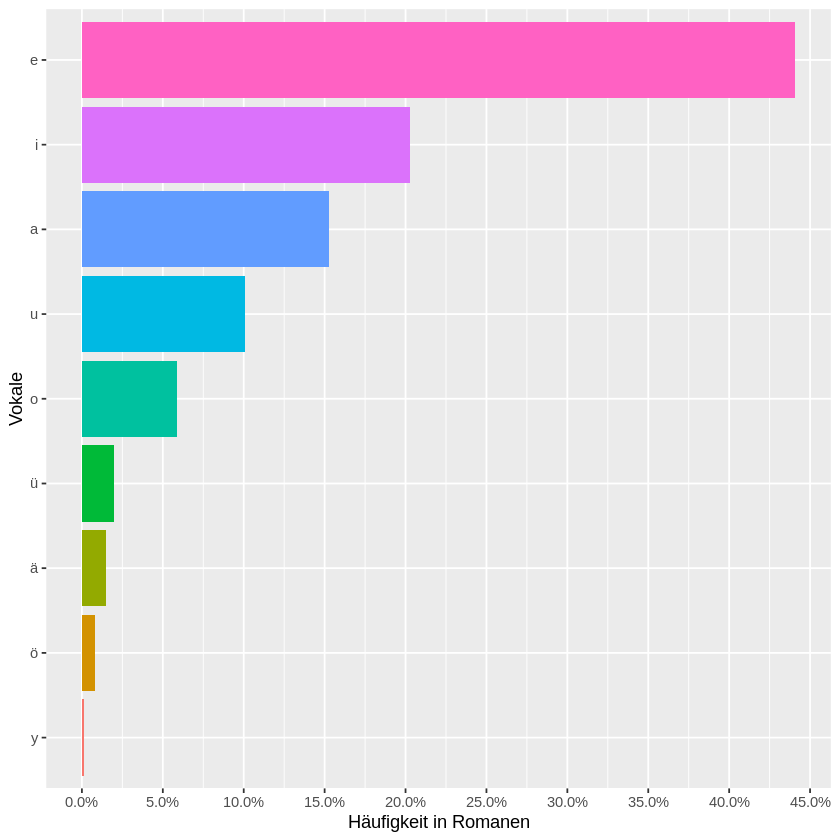

In [52]:
library(scales)
char_freq %>% 
  filter(str_detect(character, vokale)) %>% 
  mutate(Prozent = n / sum(n)) %>% # Umwandlung in Prozente
  ungroup() %>% 
  mutate(character = fct_reorder(character, Prozent)) %>% # Sortieren nach Prozenten
  ggplot(aes(Prozent, character, fill = character)) +
  geom_col() +
  theme(legend.position = "none") +
  labs(y = "Vokale", x = "Häufigkeit in Romanen") +
  scale_x_continuous(labels = percent, breaks = seq(0, 0.50, 0.05)) # Prozent-Format


Am häufigsten kommt der Buchstabe "e" in den Romanen vor (fast 45%-iger Anteil unter den Vokalen!), am seltensten "y", welches im Wesentlichen in Fremd- und Lehnwörtern auftritt.


# 5. Konsonanten

Welche Buchstaben, die Konsonanten symbolisieren, kommen am häufigsten vor?
Zum Filtern verwenden wir wiederum die Vokalliste, dieses Mal allerdings mit Negationszeichen "!".


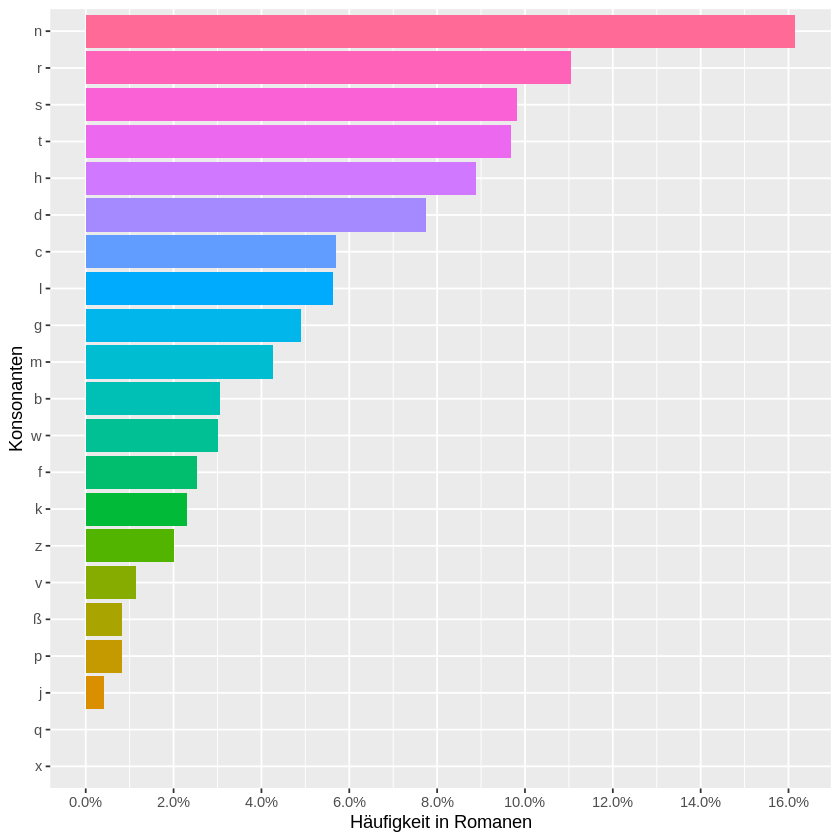

In [53]:
library(scales)
char_freq %>% 
  filter(!str_detect(character, vokale)) %>% # Negationszeichen, daher Konsonanten beibehalten
  mutate(Prozent = n / sum(n)) %>% # Umwandlung in Prozente
  ungroup() %>% 
  mutate(character = fct_reorder(character, Prozent)) %>% # Sortieren nach Prozenten
  ggplot(aes(Prozent, character, fill = character)) +
  geom_col() +
  theme(legend.position = "none") +
  labs(y = "Konsonanten", x = "Häufigkeit in Romanen") +
  scale_x_continuous(labels = percent, breaks = seq(0, 0.50, 0.02)) # Prozent-Format und Einheiten


Der Buchstabe "n" kommt in den Romanen am häufigsten vor, gefolgt von den Buchstaben: "r, s, t, h, d".
Selten sind die Buchstaben: "x, q, p, ß, v".


# 6. Vokal-Konsonant-Verhältnis

Welches Zahlenverhältnis besteht zwischen den Vokalen und Konsonanten?

21 konsonantische Buchstaben und 9 vokalische Buchstaben. Pro Silbe sind in den deutschen Texten 1 Vokal und ungefähr 2 Konsonanten zu erwarten, also Silbenstrukturen wie z.B. KVK, KKV, VKK.


In [54]:
char_freq %>% 
  mutate(buchstabe = ifelse(str_detect(character, vokale), "Vokal", "Konsonant")) %>% 
  count(buchstabe)


buchstabe,n
<chr>,<int>
Konsonant,21
Vokal,9


Der höhere Anteil der Konsonanten entspricht der größeren Konsonantenmenge.



In [55]:
char_freq %>% 
  mutate(buchstabe = ifelse(str_detect(character, vokale), "Vokal", "Konsonant")) %>% 
  mutate(Prozent = n / sum(n)) %>% 
  group_by(buchstabe) %>% 
  summarise(Avg_Prozent = sum(Prozent))


buchstabe,Avg_Prozent
<chr>,<dbl>
Konsonant,0.6251461
Vokal,0.3748539


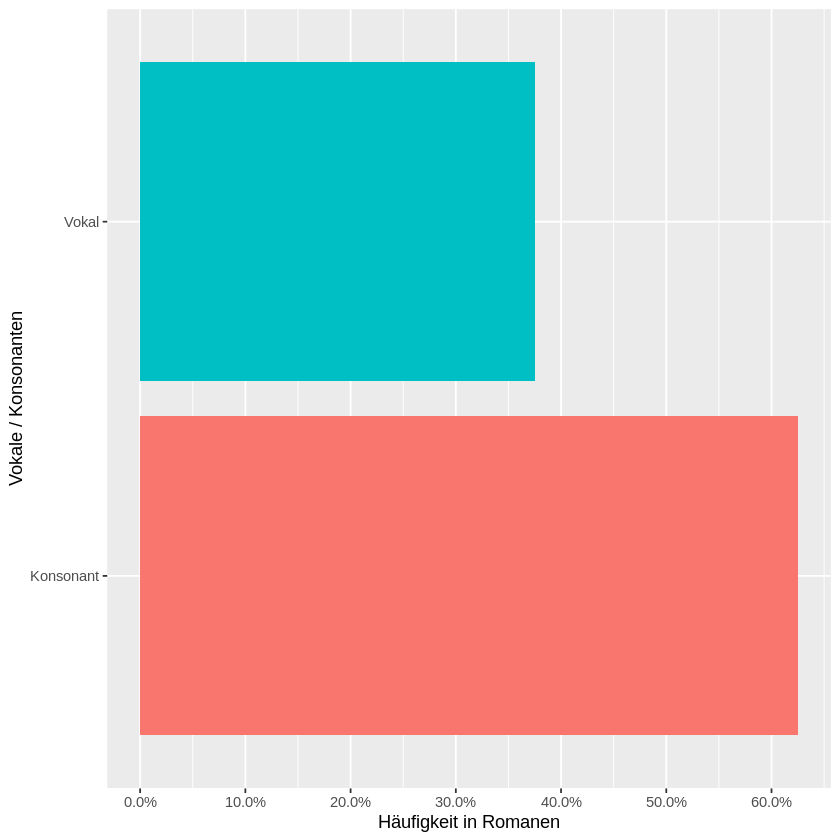

In [56]:
char_freq %>% 
  mutate(buchstabe = ifelse(str_detect(character, vokale), "Vokal", "Konsonant")) %>% 
  mutate(Prozent = n / sum(n)) %>% 
  group_by(buchstabe) %>% 
  summarise(Avg_Prozent = sum(Prozent)) %>% 
  ggplot(aes(Avg_Prozent, buchstabe, fill = buchstabe)) +
  geom_col() +
  theme(legend.position = "none") +
  labs(y = "Vokale / Konsonanten", x = "Häufigkeit in Romanen") +
  scale_x_continuous(labels = percent, breaks = seq(0, 0.75, 0.1)) # Prozent-Format und Einheiten


Diese Zahlenwerte und -verhältnisse bilden einen möglichen Ausgangspunkt für intra- oder interlinguale Vergleiche. 


# 7. Anzahl der Silben

Wie viele Silben kommen in den Romanen schätzungsweise vor und wie viele Buchstaben pro Silbe? Die genaue Bestimmung der Silbenanzahl für eine bestimmte Sprache kann aufgrund zahlreicher Besonderheiten ziemlich kompliziert sein. Die Anzahl der Silben schätzen wir daher mit einer Funktion des Programms *nsyllable* (Alternatives Programm: *qdap*). 

Da wir die Silbenzählfunktion nur ein einziges Mal bemühen, rufen wir sie in der unten sichtbaren Form auf: *nsyllable::nsyllable(buchstabenfolge)*.


In [ ]:
install.packages("nsyllable")

In [26]:
novels_words = novels %>%
  unnest_tokens(word, text, token = "words", to_lower = TRUE, drop = T) %>% 
  mutate(syllables = nsyllable::nsyllable(as.character(word), language = "en")) %>% 
  mutate(letters = nchar(word))
  
head(novels_words) %>% paged_table()


doc_id,word,syllables,letters
<chr>,<chr>,<int>,<int>
prozess,der,1,3
prozess,prozess,2,7
prozess,by,1,2
prozess,franz,1,5
prozess,kafka,2,5
prozess,aligned,2,7


Insgesamt (d.h. kumulativ gesehen) fast 139 Tausend Silben in den Romanen. Diese Zahl bietet einen möglichen Ausgangspunkt für Textvergleiche.



In [57]:
novels_words %>% 
  count(syllables) %>% 
  summarise(Silben = sum(n))


Silben
<int>
138811


Die meisten Wortformen in den Romanen bestehen aus einer Silbe (fast 60%) oder zwei Silben (fast 30%). Das ist typisch für deutsche Texte. Kurze Funktionswörter (meist eine Silbe) kommen wesentlich häufiger vor als andere Wortklassen (Substantive, Verben, Adjektive, Adverbien).



Warning message:
“Removed 1 rows containing missing values (position_stack).”


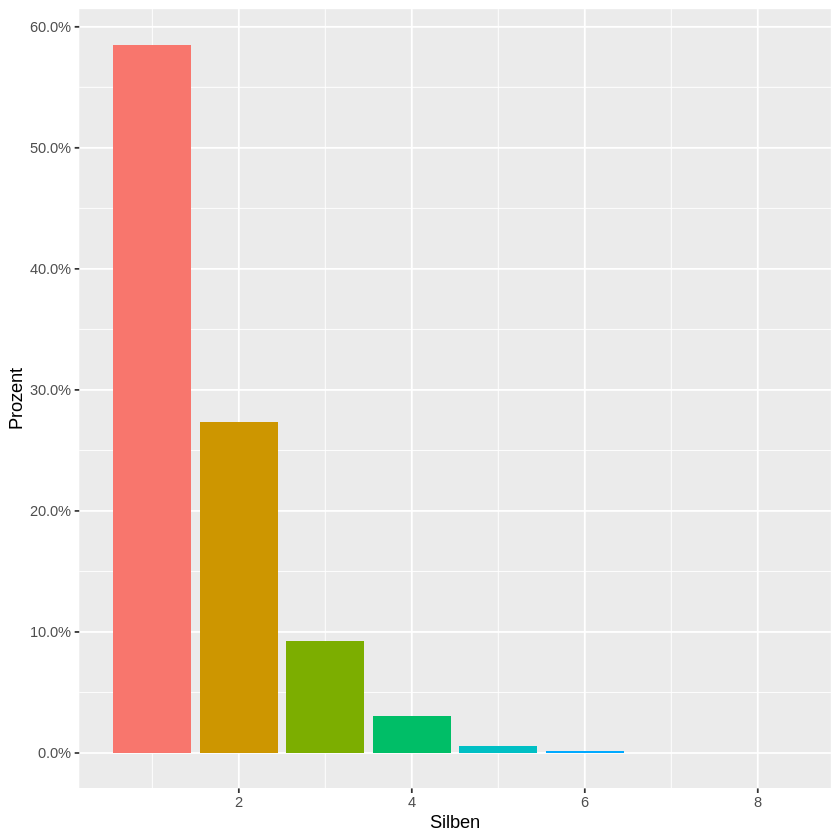

In [58]:
novels_words %>% 
  count(syllables) %>% 
  mutate(Prozent = n / sum(n)) %>% 
  ggplot(aes(syllables, Prozent, fill = factor(syllables))) +
  geom_col() +
  theme(legend.position = "none") +
  labs(x = "Silben") +
  scale_y_continuous(labels = percent, breaks = seq(0, 0.75, 0.1)) # Prozent-Format und Einheiten


Berücksichtig man lediglich distinktive Wortformen (also keine Wortwiederholungen), dann ergibt sich die folgende Verteilung, in der die Zweisilber (mehr als 30%) und Dreisilber (fast 30%) den größten Anteil haben.



Warning message:
“Removed 1 rows containing missing values (position_stack).”


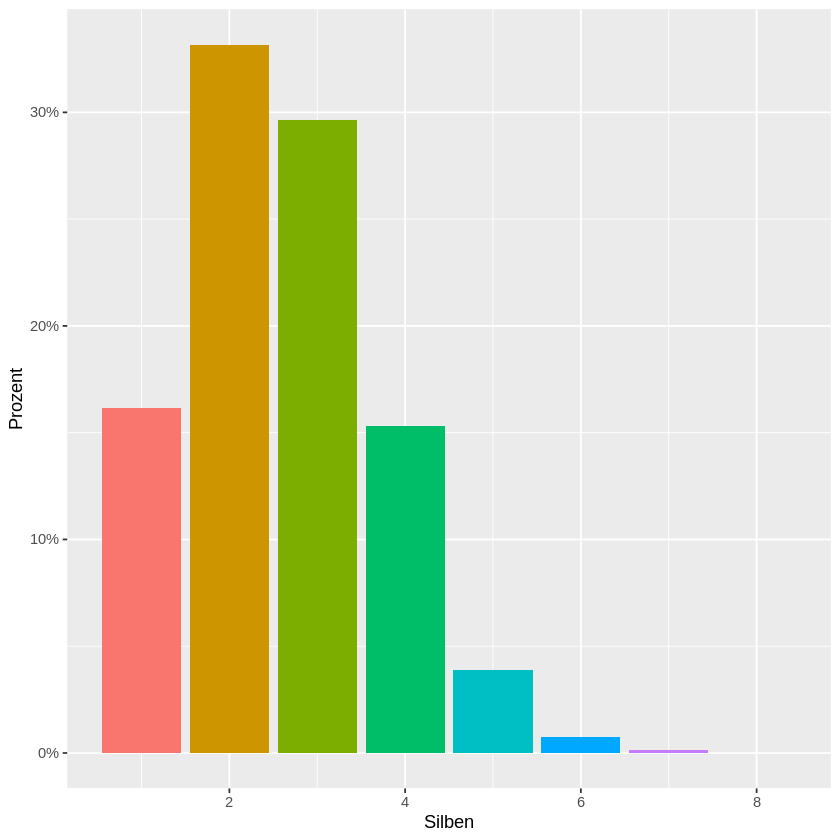

In [59]:
novels_words %>% 
  distinct(word, .keep_all = T) %>%
  count(syllables) %>% 
  mutate(Prozent = n / sum(n)) %>% 
  ggplot(aes(syllables, Prozent, fill = factor(syllables))) +
  geom_col() +
  theme(legend.position = "none") +
  labs(x = "Silben") +
  scale_y_continuous(labels = percent, breaks = seq(0, 0.75, 0.1)) # Prozent-Format und Einheiten


# 8. Mittlere Wortlänge

Wir können die Wortlänge in geschriebenen Texten auf zumindest zwei grundlegende Arten messen:
- die Anzahl der Silben pro Wort(form),
- die Anzahl der Buchstaben pro Wort(form).

Die durchschnittliche Anzahl der Silben und Buchstaben pro Wort (distinkte Wortformen !) in den Romanen ist in der folgenden Tabelle zu sehen: 
- neben den Mittelwerten (Avg_Silben, Avg_Buchstaben) 
- auch die  Standardabweichungen vom entsprechenden Mittelwert (Stdev_Silben, Stdev_Buchstaben). 
Die Mittelwerte oder arithmetischen Mittel können mit der Programmfunktion *mean()* berechnet werden, die Standardabweichungen mit der Funktion *sd()*.
Die Standardabweichungen sind notwendig zur Feststellung nicht-zufälliger Unterschiede zwischen den Stichproben (d.h. den Romanen).
Bei der Berechnung der Mittelwerte und Standardabweichungen geben wir dem Programm auch die Instruktion, etwaige leere Datenzeilen (*NA*) herauszufiltern, und zwar mit Hilfe von *na.rm = TRUE*. Wird dies unterlassen, kann dies dazu führen, dass ein Mittelwert bzw. Standardabweichung nicht berechnet werden kann. 

In der folgenden Tabelle werden nur distinktive Wortformen (Types) berücksichtigt, d.h. als ob jede Wortform nur einmal pro Roman vorkommt.


In [61]:
novels_words %>% 
  group_by(doc_id) %>% 
  distinct(word, .keep_all = T) %>%
  add_count(word) %>% 
  summarise(Avg_Silben = mean(syllables, na.rm = TRUE),
            Stdev_Silben = sd(syllables, na.rm = TRUE),
            Avg_Buchstaben = mean(letters, na.rm = TRUE),
            Stdev_Buchstaben = sd(letters, na.rm = TRUE)) %>% 
  paged_table()


doc_id,Avg_Silben,Stdev_Silben,Avg_Buchstaben,Stdev_Buchstaben
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
prozess,2.598953,1.115207,8.753136,3.165985
tom,2.440148,1.072319,8.325600,3.039245


Die durchschnittliche Anzahl der Silben und Buchstaben pro Wortform (Token), bei Berücksichtigung von Wortwiederholungen in den Romanen, ist in der folgenden Tabelle zu sehen. 



In [62]:
novels_words %>% 
  group_by(doc_id) %>% 
  summarise(Avg_Silben = mean(syllables, na.rm = TRUE),
            Stdev_Silben = sd(syllables, na.rm = TRUE),
            Avg_Buchstaben = mean(letters, na.rm = TRUE),
            Stdev_Buchstaben = sd(letters, na.rm = TRUE)) %>% 
  paged_table()


doc_id,Avg_Silben,Stdev_Silben,Avg_Buchstaben,Stdev_Buchstaben
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
prozess,1.613350,0.8752739,5.048860,2.818319
tom,1.561307,0.8176069,4.975304,2.634651


# 9. Testen von Mittelwertunterschieden

## t-Test

Sind die berechneten Unterschiede zwischen den Mittelwerten relevant bzw. nicht-zufällig? Um diese Frage zu klären, kann man einen statistischen Test bemühen. Da wir lediglich zwei Samples (zwei Romanen) vergleichen wollen, kann uns ein parametrischer Test wie z.B. der t-Test Klarheit verschaffen. Wir verwenden die Programmfunktion *t.test()*.
Der t-Test bestätigt, dass "Der Prozess" im Durchschnitt etwas längere Wörter aufweist (2,59 Silben pro Wort gegenüber 2,44 Silben pro Wort in "Tom Sawyer") - wenn Anzahl distinktiver Wortformen verwendet.


In [63]:
syls = novels_words %>% 
  group_by(doc_id) %>% 
  distinct(word, .keep_all = T) %>%
  add_count(word) %>% 
  drop_na() %>% 
  select(doc_id, word, syllables) %>% 
  pivot_wider(names_from = doc_id, values_from = syllables)

t.test(syls$prozess, syls$tom) # significant



	Welch Two Sample t-test

data:  syls$prozess and syls$tom
t = 9.5409, df = 16477, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1261795 0.1914303
sample estimates:
mean of x mean of y 
 2.598953  2.440148 


Wenn die Wiederholung von Wortformen berücksichtigt wird, bestätigt der t-Test ebenfalls einen signifikanten Unterschied zwischen den beiden Texten. Die durchschnittliche Anzahl der Wortsilben ist niedriger, da kürzere Wortformen (solche von Konjunktionen, Präpositionen, Artikeln und anderen Funktionswörtern) häufig vorkommen.

Schnelle Form des t-Tests:


In [65]:
t.test(syllables ~ doc_id, data = novels_words)




	Welch Two Sample t-test

data:  syllables by doc_id
t = 11.395, df = 137402, p-value < 2.2e-16
alternative hypothesis: true difference in means between group prozess and group tom is not equal to 0
95 percent confidence interval:
 0.04309115 0.06099339
sample estimates:
mean in group prozess     mean in group tom 
             1.613350              1.561307 


Dasselbe Ergebnis, aber aufwendiger zu programmieren, um den Datensatz in die entsprechende Form zu bringen:



In [67]:
prozess_syl <- novels_words %>% 
  filter(doc_id == "prozess") %>% 
  select(syllables) %>% 
  rename(prozess = syllables)
tom_syl <- novels_words %>% 
  filter(doc_id == "tom") %>% 
  select(syllables) %>% 
  rename(prozess = syllables)
  
t.test(prozess_syl, tom_syl) # significant



	Welch Two Sample t-test

data:  prozess_syl and tom_syl
t = 11.395, df = 137402, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04309115 0.06099339
sample estimates:
mean of x mean of y 
 1.613350  1.561307 


Der nächste t-Test bestätigt ebenfalls, dass "Der Prozess" im Durchschnitt längere Wörter aufweist (8,79 Buchstaben pro Wort gegenüber 8.36 Buchstaben pro Wort in "Tom Sawyer".) Berücksichtigt wurden distinkte Wortformen (keine wiederholten Wortformen).



In [68]:
lets = novels_words %>% 
  group_by(doc_id) %>% 
  distinct(word, .keep_all = T) %>%
  add_count(word) %>% 
  drop_na() %>% 
  select(doc_id, word, letters) %>% 
  pivot_wider(names_from = doc_id, values_from = letters)

t.test(lets$prozess, lets$tom) # significant



	Welch Two Sample t-test

data:  lets$prozess and lets$tom
t = 8.993, df = 16472, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3306128 0.5148998
sample estimates:
mean of x mean of y 
 8.785878  8.363122 


Wenn die Wiederholung von Wortformen berücksichtigt wird, bestätigt der t-Test wiederum einen signifikanten Unterschied zwischen den beiden Texten. Die durchschnittliche Anzahl der Buchstaben pro Wort ist niedriger, da kürzere Wortformen (solche von Konjunktionen, Präpositionen, Artikeln und anderen Funktionswörtern) häufig vorkommen.

Schnelle Form des t-Tests:


In [69]:
t.test(letters ~ doc_id, data = novels_words)




	Welch Two Sample t-test

data:  letters by doc_id
t = 5.0257, df = 138808, p-value = 5.022e-07
alternative hypothesis: true difference in means between group prozess and group tom is not equal to 0
95 percent confidence interval:
 0.04486967 0.10224210
sample estimates:
mean in group prozess     mean in group tom 
             5.048860              4.975304 


Dasselbe Ergebnis, aber aufwendiger zu programmieren, um den Datensatz in die entsprechende Form zu bringen:



In [70]:
prozess_let <- novels_words %>% 
  filter(doc_id == "prozess") %>% 
  select(letters) %>% 
  rename(prozess = letters)
tom_let <- novels_words %>% 
  filter(doc_id == "tom") %>% 
  select(letters) %>% 
  rename(prozess = letters)
  
t.test(prozess_let, tom_let) # significant



	Welch Two Sample t-test

data:  prozess_let and tom_let
t = 5.0257, df = 138808, p-value = 5.022e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04486967 0.10224210
sample estimates:
mean of x mean of y 
 5.048860  4.975304 


## Lineare Regression

Hat man mehr als zwei Stichproben zu vergleichen, kann man eine lineare Regression durchführen, die auch das Testen von mehreren Einflussgrößen (Prädiktoren) erlaubt. 

Hier folgt eine Demonstration anhand des bereits gehabten Datensatzes mit zwei Stichproben (Romanen).
Die Ordinate im Koordinatensystem (Intercept, also der y-Abschnitt mit x = 0) ist bei zwei Stichproben gleich dem Mittelwert der ersten Stichprobe (title = "prozess"), d.h. 1,613350. Der geschätzte Mittelwert (Estimate) der zweiten Stichprobe (title = "tom") ist um den Wert 0,052042 niedriger, d.h. 1,613350 - 0,052042 = 1,561308 (Dezimalkommas statt Dezimalpunkte!).

Der R-Quadrat-Wert (R-squared) ist allerdings sehr klein, d.h. dass der Prädiktor "title" (Roman) nur einen Bruchteil der festgestellten Mittelwertvarianz (Veränderungen der Mittelwerte) zu erklären vermag. Möglicherweise gibt es andere Prädiktoren, die die Mittelwertvarianz besser erklären. 


In [71]:
m <- lm(syllables ~ doc_id, data = novels_words)
summary(m)
anova(m)



Call:
lm(formula = syllables ~ doc_id, data = novels_words)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6133 -0.6133 -0.5613  0.4387  6.3867 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.613350   0.003183  506.85   <2e-16 ***
doc_idtom   -0.052042   0.004577  -11.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8479 on 137403 degrees of freedom
  (1406 observations deleted due to missingness)
Multiple R-squared:  0.00094,	Adjusted R-squared:  0.0009327 
F-statistic: 129.3 on 1 and 137403 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
doc_id,1,92.93703,92.9370289,129.2782,6.07959e-30
Residuals,137403,98777.86879,0.7188916,NA,NA


Graphische Darstellung: der Mittelwertunterschied ist gering (nur 0,05 Silben), aber aufgrund der großen Stichproben statistisch signifikant. Der Faktor "title" bzw. "doc_id" erklärt nur einen verschwinded kleinen Bruchteil der Mittelwertunterschiede.



In [72]:
install.packages("effects")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘numDeriv’, ‘mitools’, ‘carData’, ‘lme4’, ‘survey’, ‘estimability’, ‘insight’




Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



 model: syllables ~ doc_id

 doc_id effect
doc_id
 prozess      tom 
1.613350 1.561307 

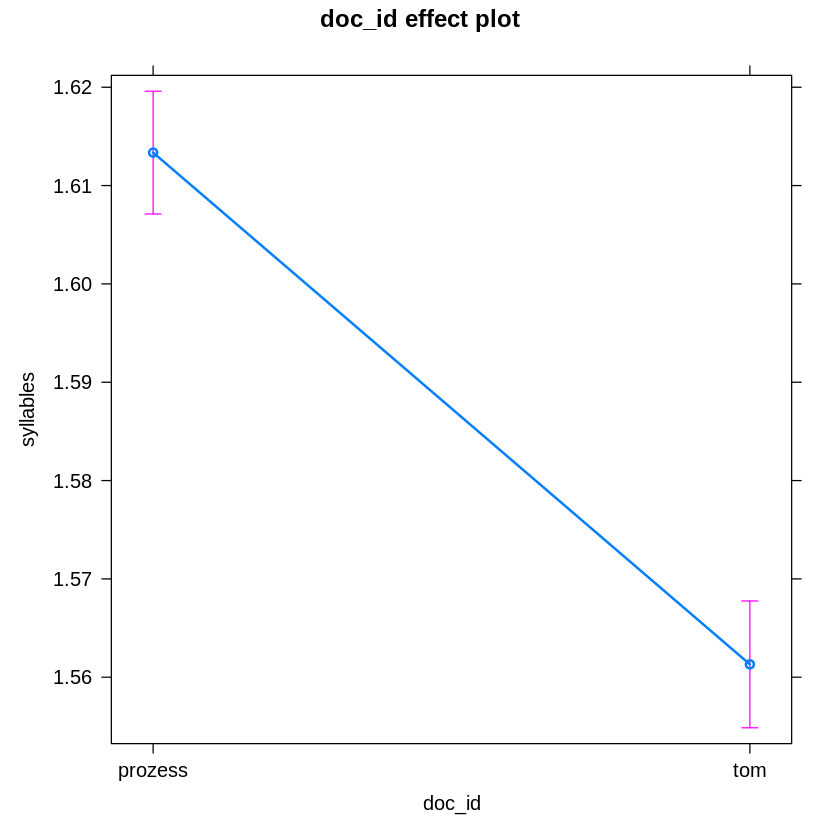

In [73]:
library(effects)
allEffects(m)
plot(allEffects(m))


Ergebnisse in Tabellenform:



In [77]:
summary(lm(syllables ~ doc_id, data = novels_words)) %>% 
  tidy() %>% paged_table()


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.61334968,0.003183071,506.85317,0.00000e+00
doc_idtom,-0.05204227,0.004577133,-11.37006,6.07959e-30


Boxplot mit Jitterplot anhand des vollen Datensatzes: der Mittelwert ist hier der Median *median()* (d.h. ein Wert, der genau in der Mitte jeder Stichprobe liegt), das arithmetische Mittel / der Durchschnitt wird hier mit einem roten Quadrat symbolisiert. Der Median liegt in beiden Stichproben beim Wert 1, also weit unter dem jeweiligen Durchschnittswert. Dies zeigt, dass die Wortlängen nicht normalverteilt sind. Der Jitterplot veranschaulicht, dass der "Prozess" über mehr Wortformen mit 6, 7 oder 8 Silben verfügt.



Warning message:
“Removed 1406 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1406 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 1406 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”


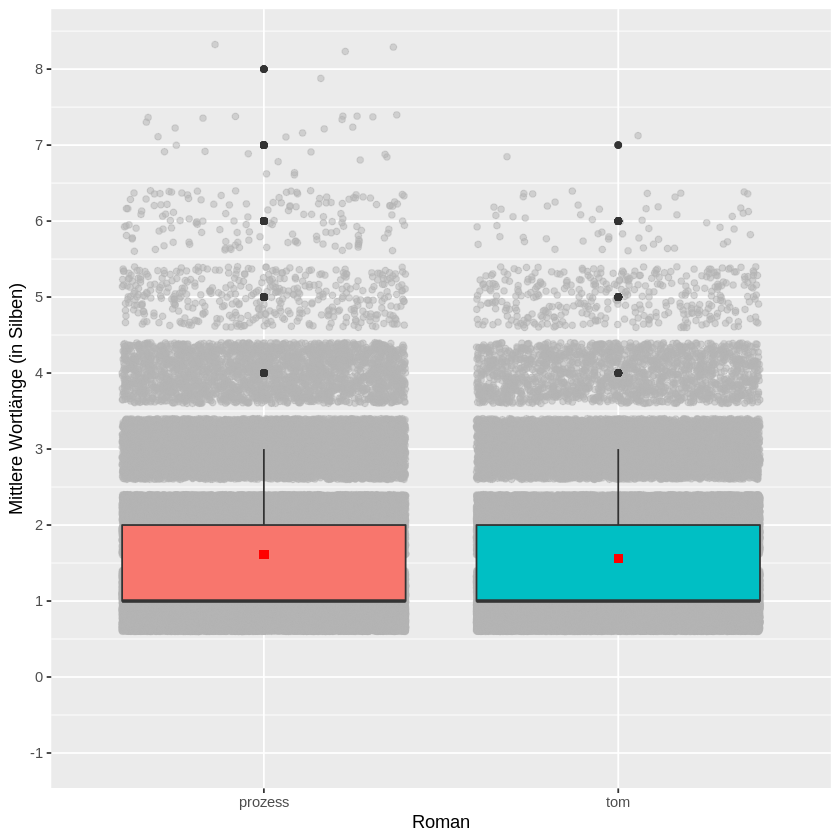

In [79]:
novels_words %>% 
  group_by(doc_id) %>% 
  ggplot(aes(doc_id, syllables, fill = doc_id, group = doc_id)) +
  geom_jitter(width = 0.4, alpha = 0.5, color = "gray70") +
  geom_boxplot(notch = FALSE, width = 0.8) +
  stat_summary(fun="mean", color = "red", shape = 15)+
  expand_limits(y = -1) +
  scale_y_continuous(breaks = seq(-1, 8, 1)) +
  theme(legend.position = "none") +
  labs(y = "Mittlere Wortlänge (in Silben)", x = "Roman")


Boxplot anhand der zusammengefassten Daten (Durchschnitt, Standardabweichung):



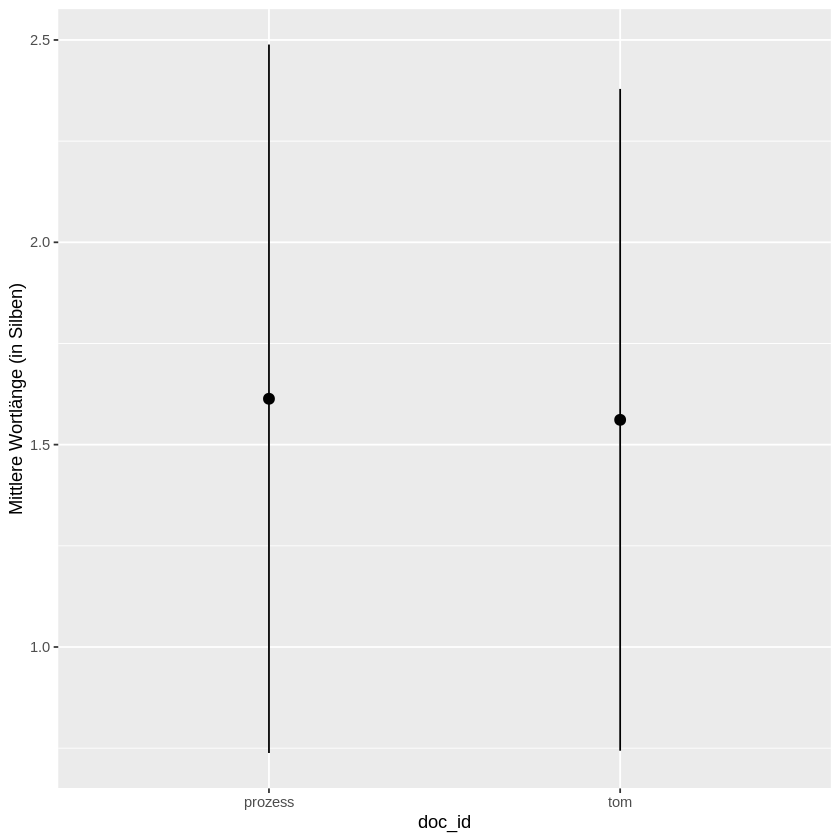

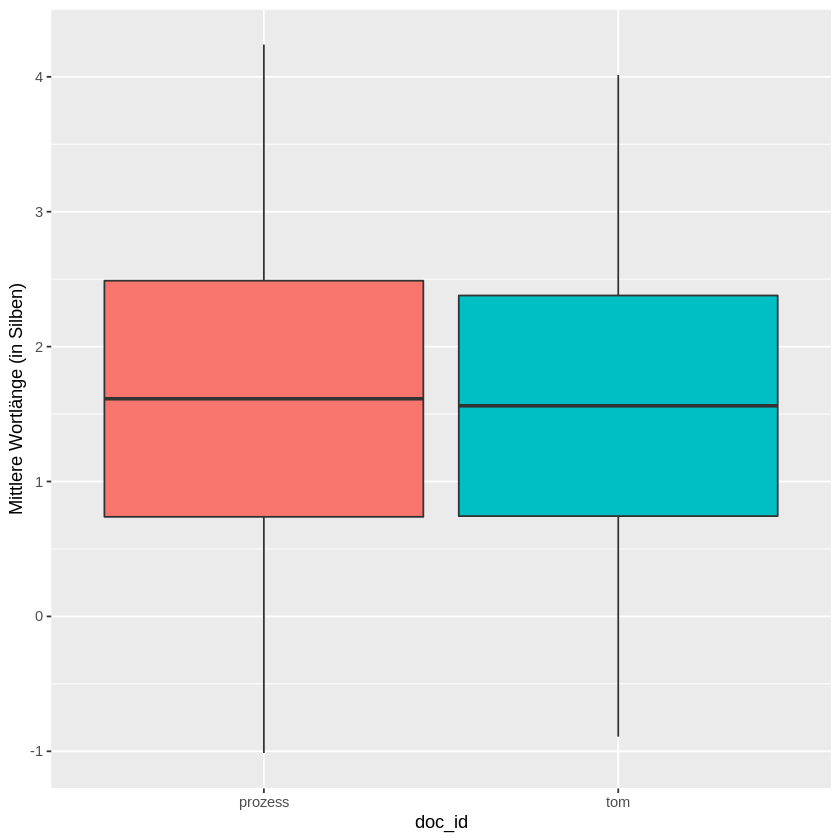

In [80]:
df = novels_words %>% 
  group_by(doc_id) %>% 
  summarise(Avg_Silben = mean(syllables, na.rm = TRUE),
            Stdev_Silben = sd(syllables, na.rm = TRUE),
            Avg_Buchstaben = mean(letters, na.rm = TRUE),
            Stdev_Buchstaben = sd(letters, na.rm = TRUE))

df %>% ggplot(aes(doc_id, Avg_Silben, fill = doc_id, group = doc_id)) +
  geom_pointrange(aes(ymin = Avg_Silben - Stdev_Silben, ymax = Avg_Silben + Stdev_Silben),
               stat="identity") +
  theme(legend.position = "none") +
  labs(y = "Mittlere Wortlänge (in Silben)")

df %>% ggplot(aes(doc_id, fill = doc_id, group = doc_id)) +
  geom_boxplot(aes(lower = Avg_Silben - Stdev_Silben, upper = Avg_Silben + Stdev_Silben,
                   middle = Avg_Silben,
                   ymin = Avg_Silben - 3*Stdev_Silben, ymax = Avg_Silben + 3*Stdev_Silben),
               stat="identity") +
  theme(legend.position = "none") +
  labs(y = "Mittlere Wortlänge (in Silben)")


# 10. Quanteda-Funktionen

Eine alternative Berechnung der Anzahl der Buchstaben pro Wort mit *quanteda* (ohne t-Test). 

Die Durchschnittswerte, die uns quanteda liefert, sind etwas höher als die tidyverse-Werte. Aber auch hier ist der Mittelwert für den "Prozess" höher als für "Tom Sawyer".


In [82]:
install.packages("quanteda.textstats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxyC’




In [90]:
library(quanteda)
library(quanteda.textstats)
corp = corpus(novels, text_field = "text")
stats = textstat_summary(corp)

stats %>% paged_table()

stats %>% 
  group_by(document) %>% 
  transmute(buchstaben = (chars-puncts)/tokens) %>% paged_table()


,document,chars,sents,tokens,types,puncts,numbers,symbols,urls,tags,emojis
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,prozess,482722,3845,88010,7907,16380,10,0,0,0,0
2,tom,460249,4652,85841,9860,18785,9,0,0,0,0


document,buchstaben
<chr>,<dbl>
prozess,5.298739
tom,5.142811


Die Durchschnittswerte unterscheiden sich in den Berechnungen (tidyverse vs. quanteda), was mit der verschiedenen Art der Tokenisierung und der Aussonderung von nicht relevanten Tokens und leeren Datenzeilen (NA) zu tun hat. 


# 11. Konsonantenverbindungen

Welche Konsonantenverbindungen (Buchstabenverbindungen) kommen häufiger vor in den Texten?
Wir zerlegen die Texte im Korpus in kleinere Einheiten (mittels *tokens*()), aber dieses Mal in alphanumerische Zeichen (Buchstaben). 
Anschließend wenden wir *char_ngrams()*-Funktion an, mit der man Verknüpfungen von Zeichen feststellen kann.


In [91]:
tok_ch = tokens(corp, what = "character", remove_punct = TRUE, remove_symbols = T, remove_numbers = T, remove_url = T, remove_separators = T)

ngrams_ch = char_ngrams(as.character(tok_ch), n = c(2,3,4), concatenator = "")


Wir wandeln die ngram-Liste in einen Datensatz um (mittels *tibble()*), was das Zählen mit einer *tidyverse*-Funktion ermöglicht.



In [92]:
ngrams_char = ngrams_ch %>% 
  as_tibble() %>% 
  rename(cluster = value)

ngrams_char %>% 
  count(cluster, sort = TRUE) %>% 
  head(10) %>% 
  paged_table()


cluster,n
<chr>,<int>
en,26084
er,23737
ch,22570
te,15489
ei,14106
nd,12972
de,12831
ie,11753
in,11525


to be continued ...


# 12. Datensatz-Variante


In [ ]:
novels_words_char <- novels %>%
  unnest_tokens(word, text, token = "words", to_lower = TRUE, drop = T) %>% 
  mutate(Silben = nsyllable::nsyllable(as.character(word), language = "en")) %>% 
  unnest_tokens(character, word, token = "characters", to_lower = TRUE, drop = F) %>% 
  mutate(buchstabe = ifelse(str_detect(character, vokale), "Vokal", "Konsonant"))
  
head(novels_words_char) %>% head(10) %>% paged_table()
